**Importing libraries and Preparing all data paths**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import numpy as np

# Configurar la ruta al dataset
dataset_path = Path('/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset')



**Find out the number of images in each folder**

In [4]:

import os
import glob as gb

# Ruta base de tu dataset
fish_path = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

# Lista para almacenar las rutas completas de todas las imágenes RGB
all_path = []

# Recorrer cada carpeta (una por clase)
for class_folder in os.listdir(fish_path):
    if class_folder in ['Segmentation_example_script.m','README.txt','license.txt']:
        continue  # Omitir archivos que no son carpetas de clase
    
    rgb_path = os.path.join(fish_path, class_folder, class_folder)  # Ruta a las imágenes RGB
    
    if not os.path.exists(rgb_path):
        continue  # A veces puede que no exista la carpeta esperada
    
    all_data = gb.glob(os.path.join(rgb_path, '*.*'))  # Obtener todas las imágenes dentro de la carpeta
    print(f'Found {len(all_data)} images in class "{class_folder}"')
    all_path.extend(all_data)

print(f'\nTotal de imágenes RGB encontradas: {len(all_path)}')


Found 1000 images in class "Hourse Mackerel"
Found 1000 images in class "Black Sea Sprat"
Found 1000 images in class "Sea Bass"
Found 1000 images in class "Red Mullet"
Found 1000 images in class "Trout"
Found 1000 images in class "Striped Red Mullet"
Found 1000 images in class "Shrimp"
Found 1000 images in class "Gilt-Head Bream"
Found 1000 images in class "Red Sea Bream"

Total de imágenes RGB encontradas: 9000


**Creat images data frame**

In [5]:
import pandas as pd
import os

# Crear DataFrame con la ruta completa y la etiqueta
images_df = pd.DataFrame({'Filepath': all_path})
images_df['Label'] = images_df['Filepath'].apply(lambda x: os.path.basename(os.path.dirname(x)))

# Mostrar más columnas si hay rutas largas
pd.options.display.max_colwidth = 200

# Barajar los datos y resetear índice
images_df = images_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Mostrar las primeras 5 filas
images_df.head(5)


,Filepath,Label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/00431.png,Gilt-Head Bream
1,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00131.png,Black Sea Sprat
2,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00381.png,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Trout/Trout/00478.png,Trout
4,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream/00761.png,Red Sea Bream


**Find out the number of images in each folder**

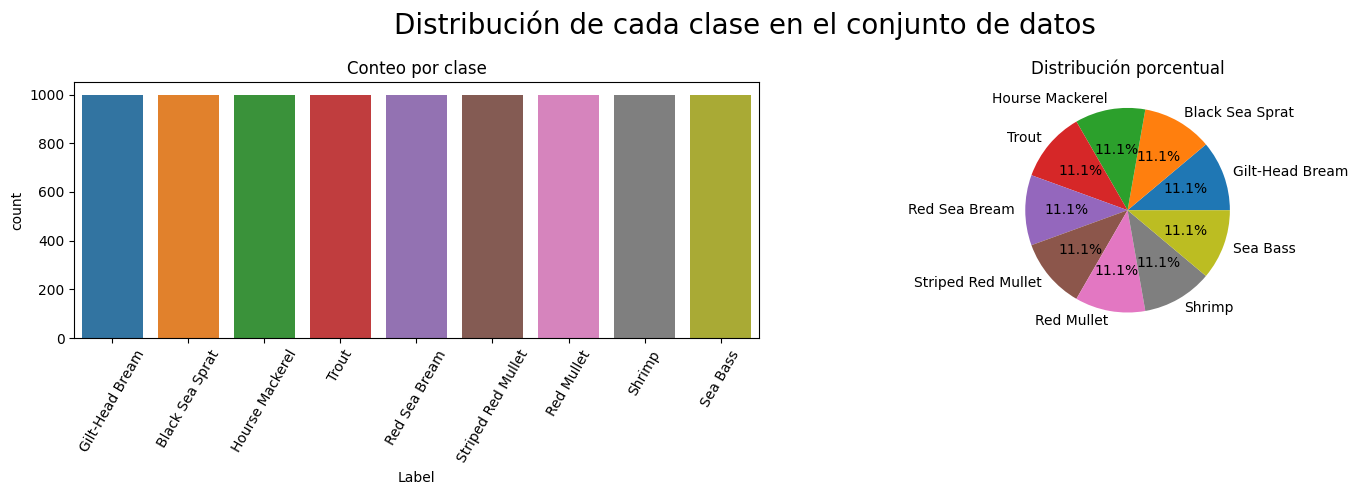

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Gráfico de barras
plt.subplot(1, 2, 1)
sns.countplot(data=images_df, x='Label')
plt.xticks(rotation=60)
plt.title("Conteo por clase")

# Gráfico de pastel
plt.subplot(1, 2, 2)
plt.pie(
    x=images_df['Label'].value_counts().values,
    labels=images_df['Label'].value_counts().index,
    autopct='%1.1f%%'
)
plt.title("Distribución porcentual")

plt.suptitle('Distribución de cada clase en el conjunto de datos', fontsize=20)
plt.tight_layout()
plt.show()




**Display 20 pictures of the dataset**

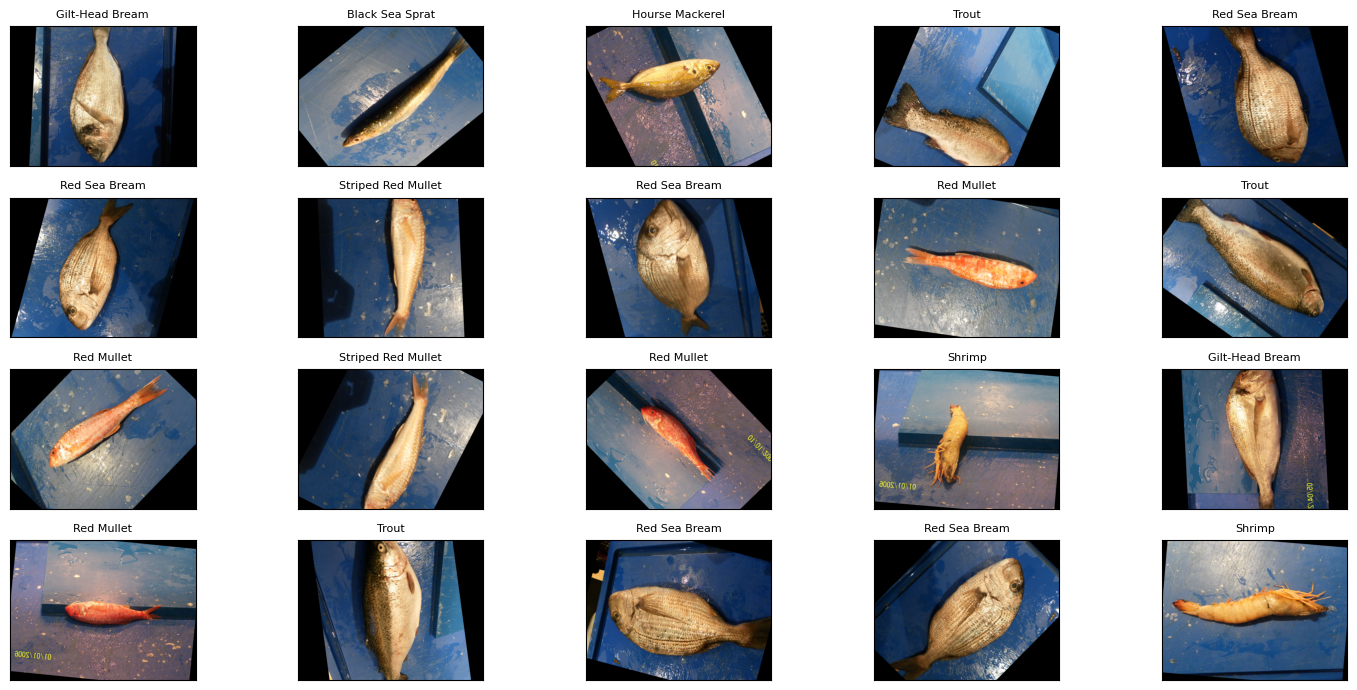

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 7),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < len(images_df):
        img = plt.imread(images_df.Filepath[i])
        ax.imshow(img)
        ax.set_title(images_df.Label[i], fontsize=8)
    else:
        ax.axis('off')  # Por si hay menos de 20 imágenes
plt.tight_layout()
plt.show()


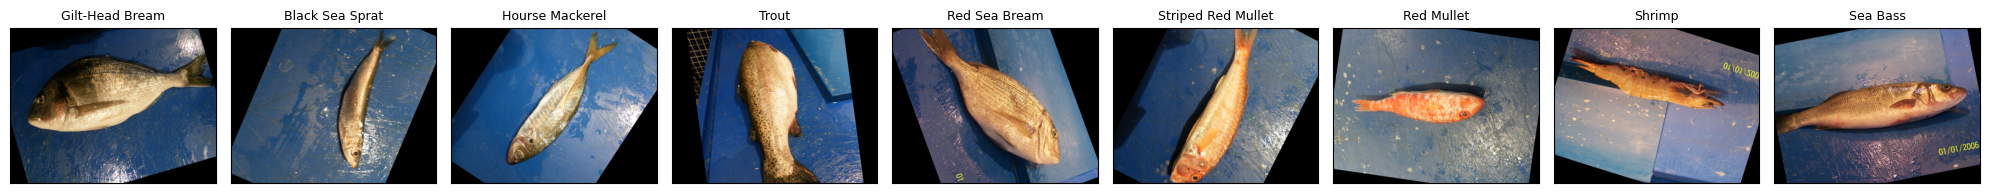

In [10]:
import matplotlib.pyplot as plt
import random

# Obtener clases únicas
unique_classes = images_df['Label'].unique()

# Crear una figura con una subimagen por clase
fig, axes = plt.subplots(1, len(unique_classes), figsize=(20, 5),
                         subplot_kw={'xticks': [], 'yticks': []})

for ax, label in zip(axes, unique_classes):
    # Filtrar imágenes de esta clase
    class_images = images_df[images_df['Label'] == label]
    # Seleccionar una imagen aleatoria
    img_path = random.choice(class_images['Filepath'].values)
    # Mostrar imagen
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.set_title(label, fontsize=9)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


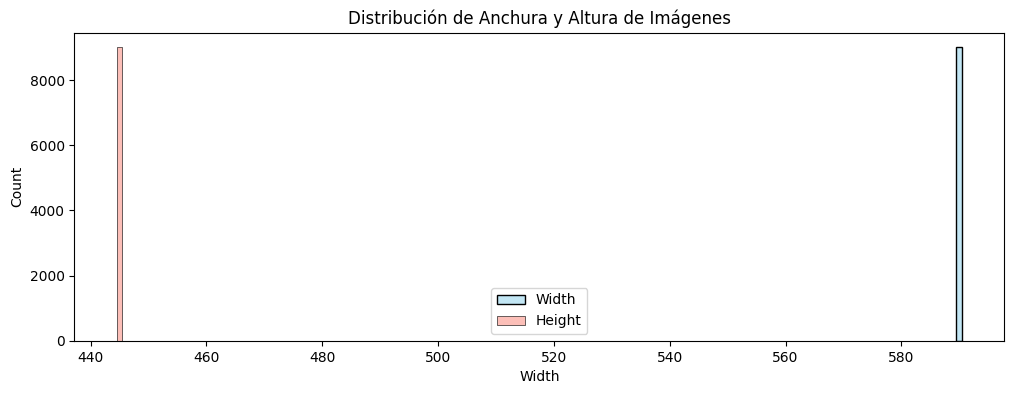

In [11]:
# Tamaños de imagen
sizes = images_df['Filepath'].apply(lambda x: Image.open(x).size)
images_df['Width'], images_df['Height'] = zip(*sizes)

# Distribución de tamaños
plt.figure(figsize=(12, 4))
sns.histplot(images_df['Width'], kde=True, color='skyblue', label='Width')
sns.histplot(images_df['Height'], kde=True, color='salmon', label='Height')
plt.title('Distribución de Anchura y Altura de Imágenes')
plt.legend()
plt.show()
